<a href="https://colab.research.google.com/github/Claudia060392/Portafolio-Ciencia-de-Datos/blob/main/Practicas%20Consolidadas/Modulo_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Carga del archivo manualmente
archivo = files.upload()

# Lectura del CSV
df = pd.read_csv("dataset_generos_musicales.csv")

# Primeras filas
print(df.head())

Saving dataset_generos_musicales.csv to dataset_generos_musicales.csv
     País  Pop  Rock  Hip-Hop  Electrónica  Clásica  Jazz  Reguetón  Metal
0   Chile   71    22       79           61       70    58        79     69
1    EEUU   34    41       40           79       74    37        90     23
2  México   91    72       52           99       83    23        63     21
3   Corea   80    21       95           34       22    79        27     25
4   Japón   40    49       77           81       70    33        66     73


Dimensiones: (8, 9)
Columnas: ['País', 'Pop', 'Rock', 'Hip-Hop', 'Electrónica', 'Clásica', 'Jazz', 'Reguetón', 'Metal']

Primeras filas:
     País  Pop  Rock  Hip-Hop  Electrónica  Clásica  Jazz  Reguetón  Metal
0   Chile   71    22       79           61       70    58        79     69
1    EEUU   34    41       40           79       74    37        90     23
2  México   91    72       52           99       83    23        63     21
3   Corea   80    21       95           34       22    79        27     25
4   Japón   40    49       77           81       70    33        66     73

=== K-Means ===


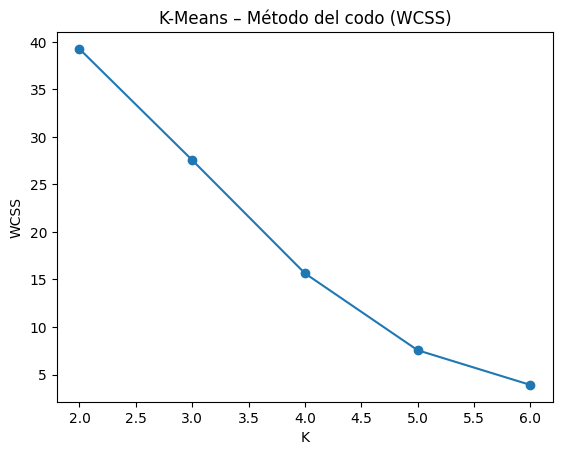

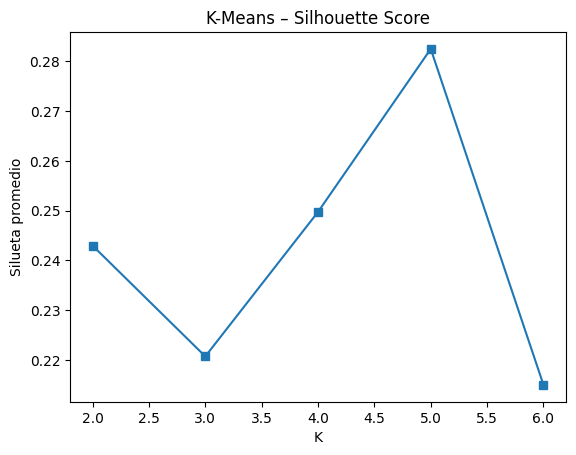

K óptimo por silueta (rango 2..6): 5
Centroides (espacio escalado):
[[ 1.00631451  0.8358654  -1.06033105  0.95365381 -0.20607699 -0.86610056
  -0.37650374 -1.02939399]
 [-1.12102394  0.90273464  0.60398604  0.4560953   0.85949184 -0.79539847
  -0.28088374  1.11638503]
 [ 0.58918933 -1.08105259  0.38923545 -0.51137958 -0.18597192  0.99572105
   1.03389121  0.86507758]
 [ 0.48490803 -1.10334233  1.54351988 -2.1422658  -1.51290669  1.65560719
  -1.88251868 -0.91340594]
 [-1.43386783 -0.21175257 -1.40930076  0.34552674  0.57802083 -0.32405123
   1.12951121 -0.99073131]]

=== Clustering jerárquico (aglomerativo) ===


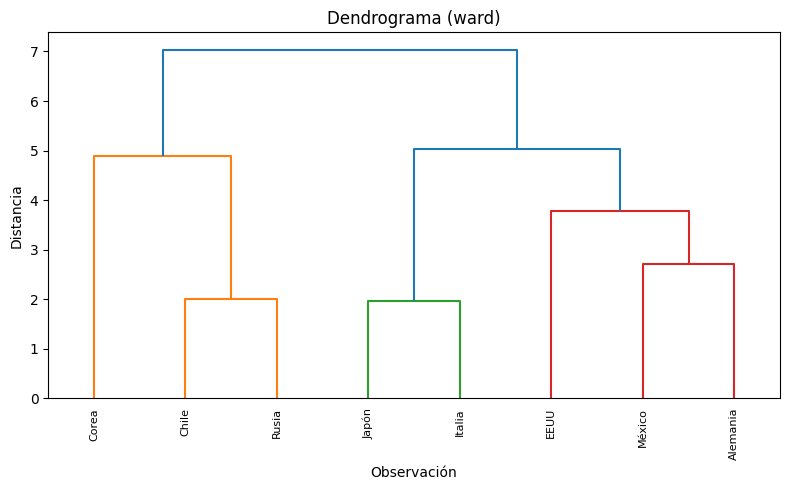


=== DBSCAN ===


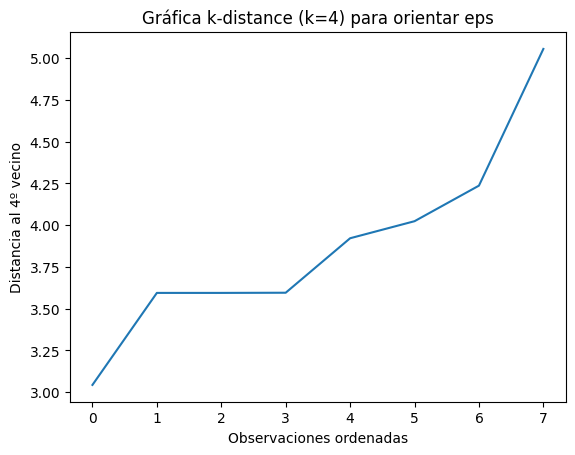

Candidatos eps: [np.float64(4.151), np.float64(4.226), np.float64(4.482)]
eps=4.151 -> clusters=1, ruido=0
eps=4.226 -> clusters=1, ruido=0
eps=4.482 -> clusters=1, ruido=0
DBSCAN seleccionado: eps=4.151, clusters=1, ruido=0

=== PCA ===
Componentes necesarios para ≥90% varianza: 4


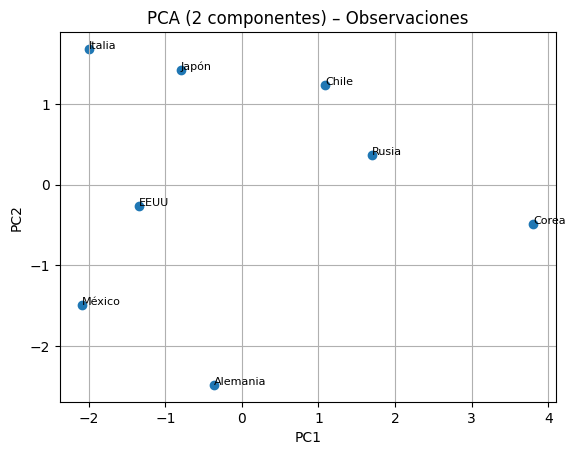


=== t-SNE ===


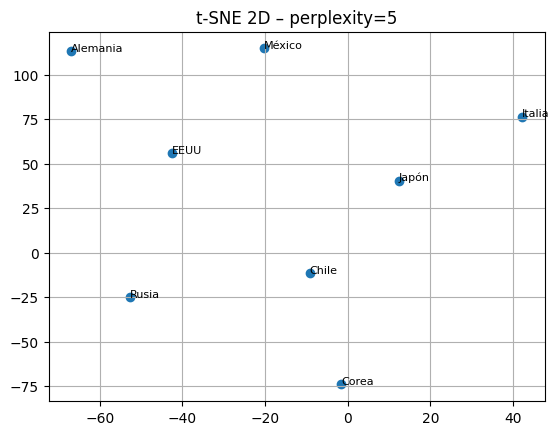


[K-Means (K=5)] Distribución de etiquetas: {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}
[K-Means (K=5)] Silhouette: 0.2825

[Jerárquico (n_clusters = k_opt)] Distribución de etiquetas: {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}
[Jerárquico (n_clusters = k_opt)] Silhouette: 0.2825

[DBSCAN (eps=4.151)] Distribución de etiquetas: {0: 8}


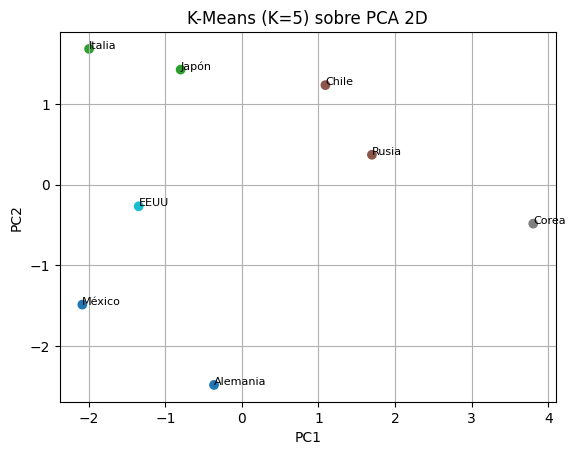

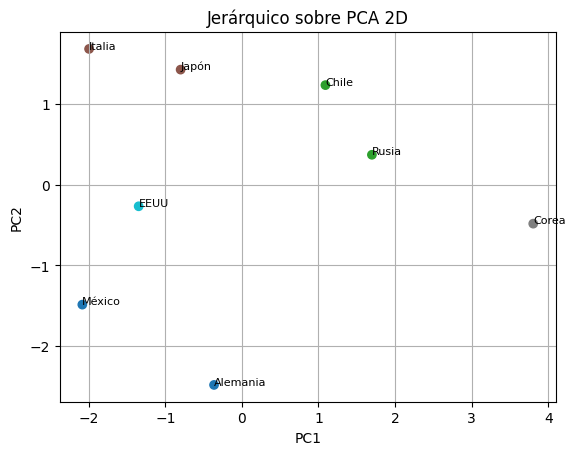

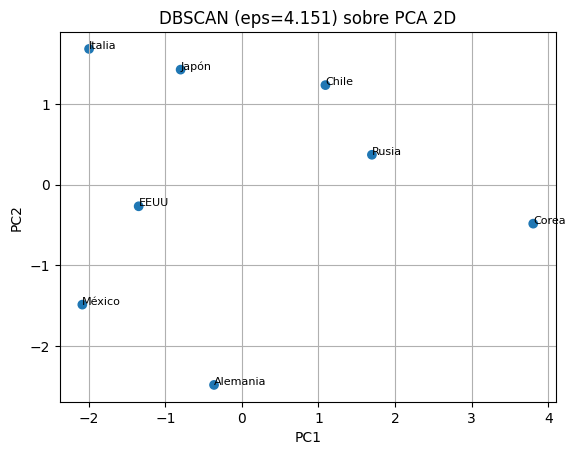

In [5]:
# ================================================================
# Evaluación Final – Módulo 7
# Análisis no supervisado (K-Means, Jerárquico, DBSCAN, PCA, t-SNE)
# ================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram

# ------------------------------------------------
# 1) Exploración breve y preparación
# ------------------------------------------------
print("Dimensiones:", df.shape)
print("Columnas:", list(df.columns))
print("\nPrimeras filas:")
print(df.head())

# Se identifica una columna de país por nombres comunes.
id_candidates = ["País", "Pais", "Country", "country", "pais"]
col_pais = next((c for c in id_candidates if c in df.columns), None)

# Se toman solo columnas numéricas como base para los métodos no supervisados.
if col_pais is not None:
    X = df.drop(columns=[col_pais]).select_dtypes(include="number").copy()
    etiquetas_paises = df[col_pais].astype(str).values
else:
    X = df.select_dtypes(include="number").copy()
    etiquetas_paises = np.array([f"Obs{i}" for i in range(len(df))])

# Limpieza mínima: se completan nulos con la media de cada columna numérica.
if X.isna().any().any():
    for c in X.columns:
        if X[c].isna().any():
            X[c] = X[c].fillna(X[c].mean())

# Escalado estándar antes de aplicar los algoritmos de clustering.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------
# 2) K-Means: codo y silueta para seleccionar K; entrenamiento final
# ------------------------------------------------
print("\n=== K-Means ===")
# Exploración de K en un rango acotado, siguiendo el estilo de clase.
wcss, sils, rangos = [], [], range(2, 7)
for k in rangos:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    wcss.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, labels))

# Gráfica de codo
plt.figure()
plt.plot(list(rangos), wcss, marker="o")
plt.title("K-Means – Método del codo (WCSS)")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

# Gráfica de silueta
plt.figure()
plt.plot(list(rangos), sils, marker="s")
plt.title("K-Means – Silhouette Score")
plt.xlabel("K")
plt.ylabel("Silueta promedio")
plt.show()

# Selección simple de K por silueta máxima en el rango testeado.
k_opt = list(rangos)[int(np.argmax(sils))]
print(f"K óptimo por silueta (rango 2..6): {k_opt}")

kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X_scaled)

print("Centroides (espacio escalado):")
print(kmeans_final.cluster_centers_)

# ------------------------------------------------
# 3) Clustering jerárquico: dendrograma y etiquetas
# ------------------------------------------------
print("\n=== Clustering jerárquico (aglomerativo) ===")
Z = linkage(X_scaled, method="ward", metric="euclidean")

plt.figure(figsize=(8, 5))
dendrogram(Z, labels=etiquetas_paises, leaf_rotation=90, leaf_font_size=8, color_threshold=None)
plt.title("Dendrograma (ward)")
plt.xlabel("Observación")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# Se fija n_clusters según k_opt para comparar contra K-Means.
agg = AgglomerativeClustering(n_clusters=k_opt, linkage="ward")
labels_hier = agg.fit_predict(X_scaled)

# ------------------------------------------------
# 4) DBSCAN: selección sencilla de eps con k-distance y prueba de min_samples
# ------------------------------------------------
print("\n=== DBSCAN ===")
k_nn = 4
nn = NearestNeighbors(n_neighbors=k_nn)
nn.fit(X_scaled)
dists, _ = nn.kneighbors(X_scaled)
k_dists = np.sort(dists[:, -1])

plt.figure()
plt.plot(k_dists)
plt.title("Gráfica k-distance (k=4) para orientar eps")
plt.xlabel("Observaciones ordenadas")
plt.ylabel("Distancia al 4º vecino")
plt.show()

# Se proponen eps desde percentiles altos de la k-distance.
candidatos_eps = [np.percentile(k_dists, p) for p in (80, 85, 90)]
print("Candidatos eps:", [round(e, 3) for e in candidatos_eps])

dbscan_resultados = {}
for eps in candidatos_eps:
    db = DBSCAN(eps=eps, min_samples=4)
    lab = db.fit_predict(X_scaled)
    n_clusters = len(set(lab) - {-1})
    n_ruido = int((lab == -1).sum())
    dbscan_resultados[eps] = {"labels": lab, "clusters": n_clusters, "ruido": n_ruido}
    print(f"eps={eps:.3f} -> clusters={n_clusters}, ruido={n_ruido}")

# Criterio simple: se toma el primer eps que genere >=2 clusters.
eps_elegido = None
for eps, info in dbscan_resultados.items():
    if info["clusters"] >= 2:
        eps_elegido = eps
        break
if eps_elegido is None:
    eps_elegido = candidatos_eps[0]

labels_dbscan = dbscan_resultados[eps_elegido]["labels"]
print(f"DBSCAN seleccionado: eps={eps_elegido:.3f}, clusters={dbscan_resultados[eps_elegido]['clusters']}, ruido={dbscan_resultados[eps_elegido]['ruido']}")

# ------------------------------------------------
# 5) PCA: cálculo de varianza acumulada y proyección 2D
# ------------------------------------------------
print("\n=== PCA ===")
pca_full = PCA()
pca_full.fit(X_scaled)
var_acum = np.cumsum(pca_full.explained_variance_ratio_)

n90 = int(np.argmax(var_acum >= 0.90) + 1)
print(f"Componentes necesarios para ≥90% varianza: {n90}")

pca2 = PCA(n_components=2, random_state=42)
X_pca = pca2.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, txt in enumerate(etiquetas_paises):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)
plt.title("PCA (2 componentes) – Observaciones")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# ------------------------------------------------
# 6) t-SNE: uso de max_iter y perplexities válidas (< n_muestras)
# ------------------------------------------------
print("\n=== t-SNE ===")
n_muestras = X_scaled.shape[0]

# Se eligen perplexities seguras en función de n_muestras.
# Si el dataset es pequeño, se filtran valores demasiado grandes automáticamente.
perplex_values = [p for p in (5, 15, 30) if p < n_muestras]
if len(perplex_values) == 0:
    # Si el dataset es muy pequeño, se usa perplexity mínima válida.
    perplex_values = [max(2, n_muestras // 2)]

for perplex in perplex_values:
    tsne = TSNE(n_components=2, random_state=42,
                perplexity=perplex, max_iter=500)  # se usa max_iter (evita el FutureWarning)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.figure()
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
    for i, txt in enumerate(etiquetas_paises):
        plt.annotate(txt, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=8)
    plt.title(f"t-SNE 2D – perplexity={perplex}")
    plt.grid(True)
    plt.show()

# ------------------------------------------------
# 7) Resúmenes rápidos (distribución de etiquetas y silueta aproximada)
# ------------------------------------------------
def resumen_clusters(nombre, labels):
    labs = np.array(labels)
    unicos = sorted(list(set(labs)))
    conteos = {int(l): int((labs == l).sum()) for l in unicos}
    print(f"\n[{nombre}] Distribución de etiquetas:", conteos)

    # Silhouette solo si hay al menos 2 clusters válidos (excluye ruido -1 si lo hubiera).
    validos = [l for l in unicos if l != -1]
    if len(validos) >= 2:
        try:
            # Para DBSCAN con ruido, se ignoran puntos -1 al calcular silueta.
            if -1 in unicos:
                mask = labs != -1
                if mask.sum() >= 2 and len(set(labs[mask])) >= 2:
                    sil = silhouette_score(X_scaled[mask], labs[mask])
                    print(f"[{nombre}] Silhouette (sin ruido): {sil:.4f}")
            else:
                sil = silhouette_score(X_scaled, labs)
                print(f"[{nombre}] Silhouette: {sil:.4f}")
        except Exception:
            pass

resumen_clusters(f"K-Means (K={k_opt})", labels_kmeans)
resumen_clusters("Jerárquico (n_clusters = k_opt)", labels_hier)
resumen_clusters(f"DBSCAN (eps={eps_elegido:.3f})", labels_dbscan)

# ------------------------------------------------
# 8) Comparaciones sobre el plano PCA 2D (coloreado por etiqueta)
# ------------------------------------------------
def plot_clusters_en_pca(labels, titulo):
    labs = np.array(labels)
    un = sorted(list(set(labs)))
    mapa = {lab: i for i, lab in enumerate(un)}
    c = [mapa[v] for v in labs]

    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c, cmap="tab10")
    for i, txt in enumerate(etiquetas_paises):
        plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)
    plt.title(titulo)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

plot_clusters_en_pca(labels_kmeans, f"K-Means (K={k_opt}) sobre PCA 2D")
plot_clusters_en_pca(labels_hier,  "Jerárquico sobre PCA 2D")
plot_clusters_en_pca(labels_dbscan, f"DBSCAN (eps={eps_elegido:.3f}) sobre PCA 2D")

